In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dsn-and-microsoft-skills-for-job/Sample_submission.csv
/kaggle/input/dsn-and-microsoft-skills-for-job/Housing_dataset_test.csv
/kaggle/input/dsn-and-microsoft-skills-for-job/Housing_dataset_train.csv


In [4]:
#importing the required libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
#reading the train data
train_df = pd.read_csv('/kaggle/input/dsn-and-microsoft-skills-for-job/Housing_dataset_train.csv')
train_df.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [6]:
#Checking for general info about the data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [5]:
#Checking for missing values in the df
train_df.isna().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

In [6]:
#Looking at the statistical distribution of the data
train_df.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


In [7]:
#Dropping na values
train_ndf = train_df.dropna()
train_ndf.shape

(5689, 7)

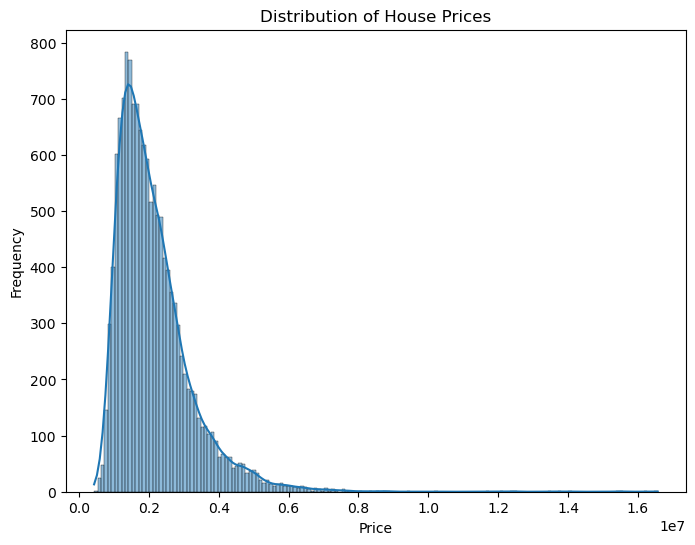

In [27]:
# Data Visualization:
# Let's create some visualizations to better understand the dataset.

# Histogram of the target variable (price)
plt.figure(figsize=(8, 6))
sns.histplot(train_df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

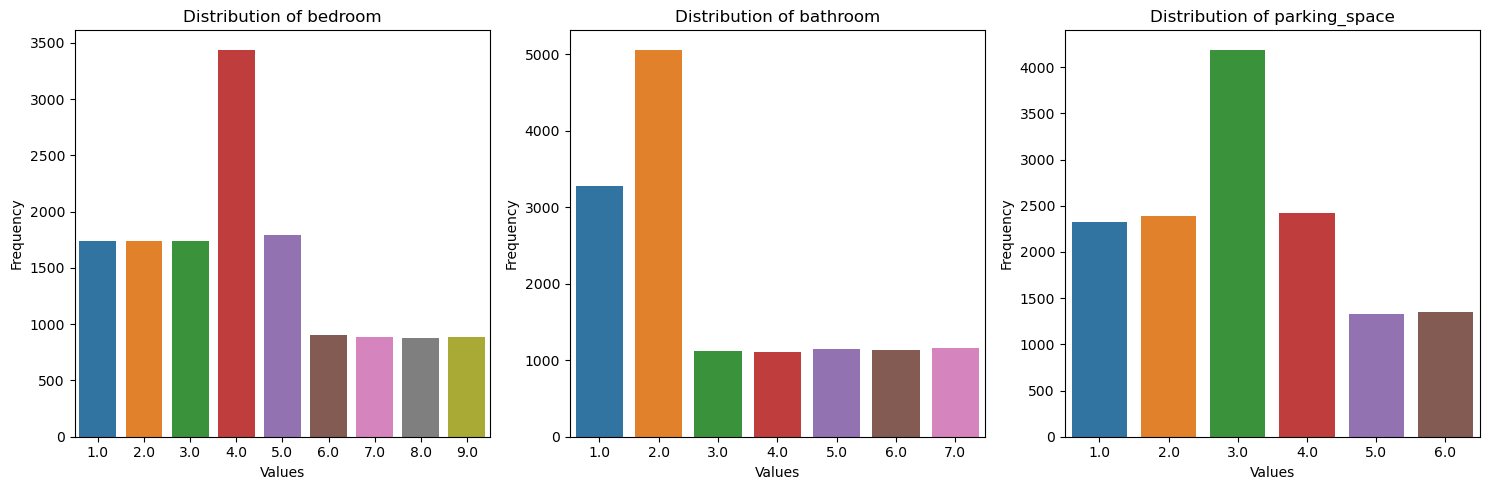

In [29]:
# Selecting only the numerical columns for plotting
num_features = ['bedroom', 'bathroom', 'parking_space']

# Create individual countplots for each feature
plt.figure(figsize=(15, 5))

for i, feature in enumerate(num_features, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=train_df, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

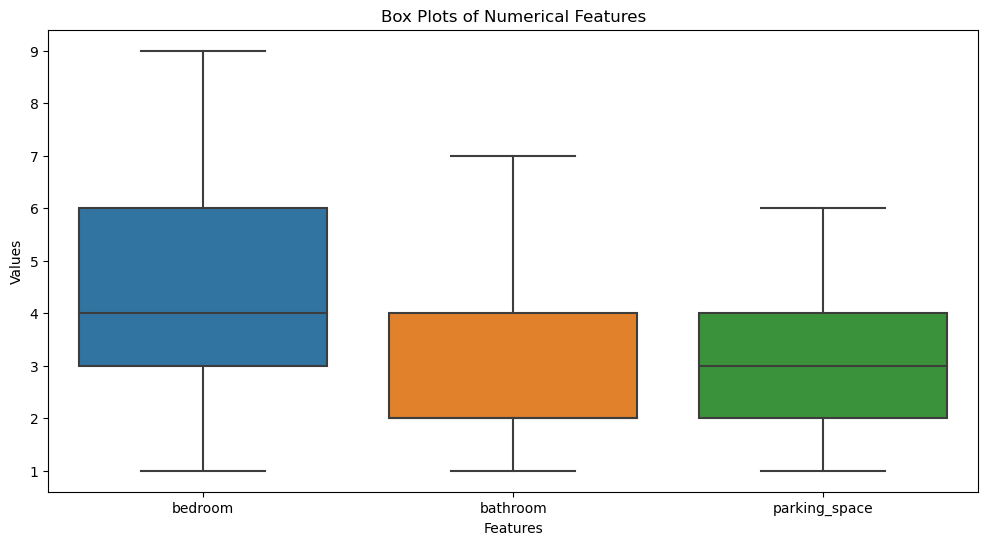

In [30]:
# Box plots of numerical features to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df[['bedroom', 'bathroom', 'parking_space']])
plt.title('Box Plots of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

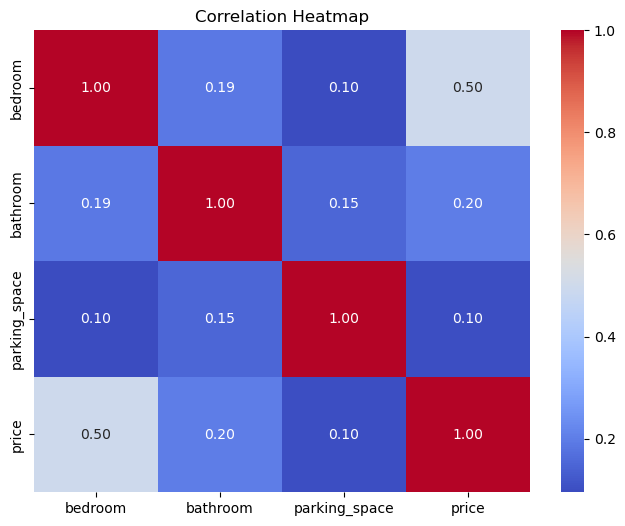

In [31]:
# Correlation heatmap to visualize relationships between numerical features
correlation_matrix = train_df[['bedroom', 'bathroom', 'parking_space', 'price']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


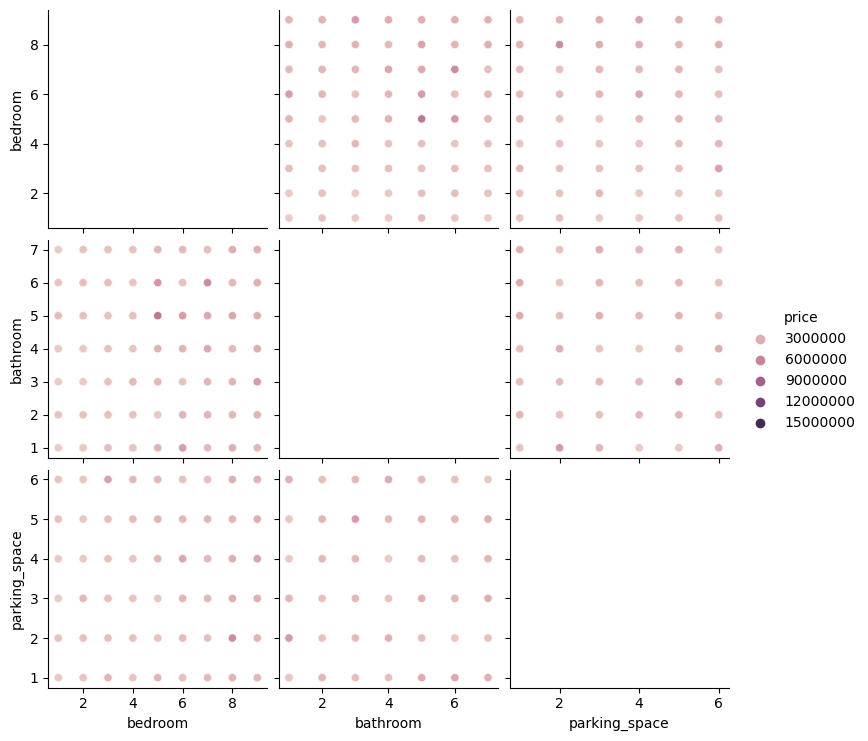

In [8]:
# Pairplot to explore relationships between numerical features and the target variable
sns.pairplot(train_df, vars=['bedroom', 'bathroom', 'parking_space'], hue='price')
plt.show()

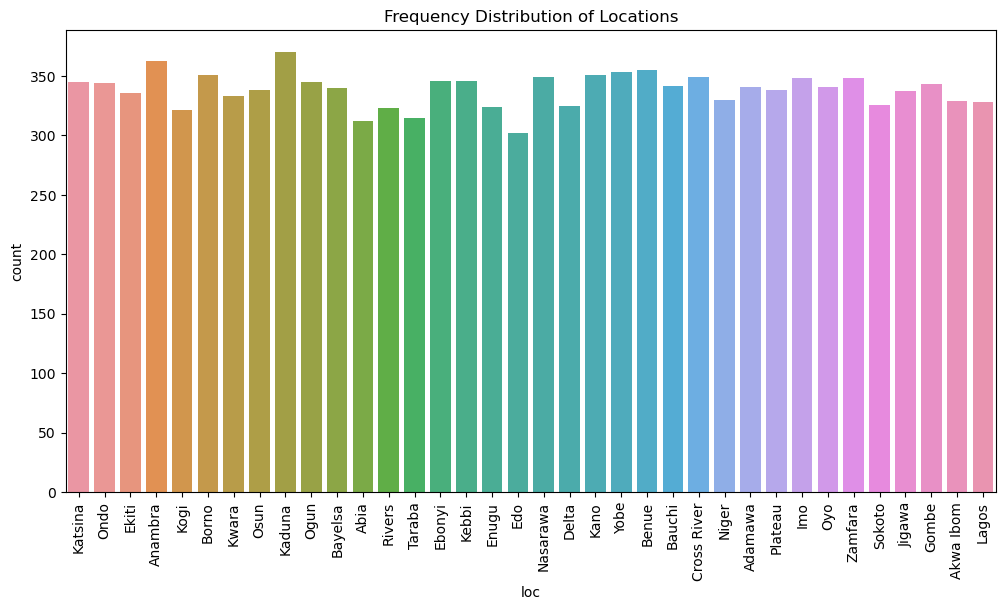

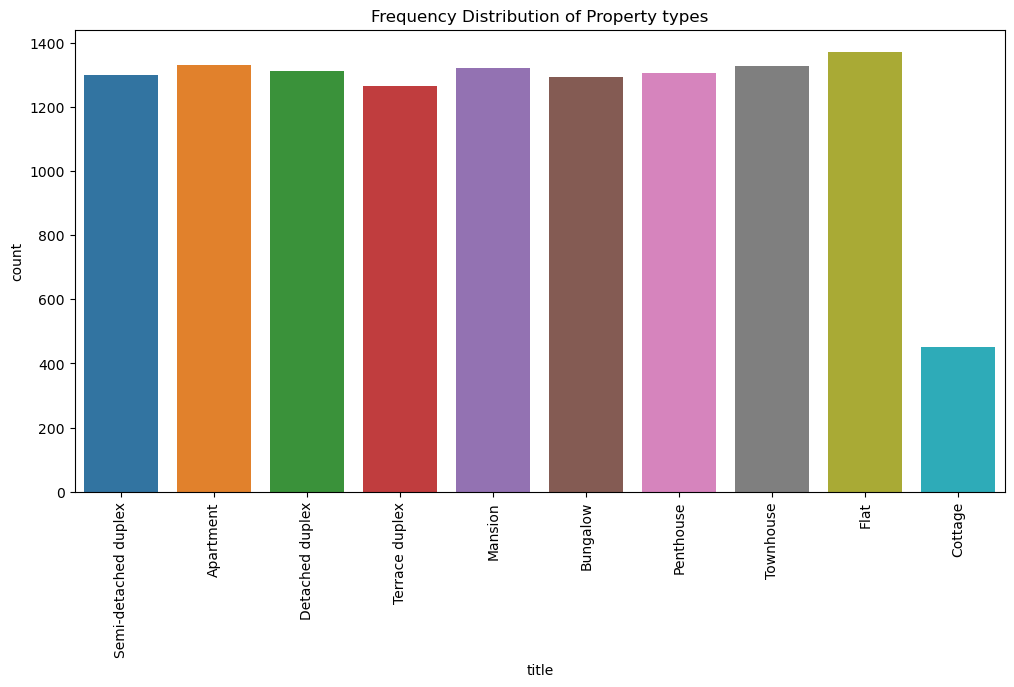

In [11]:
# Visualize the frequency distribution of categorical features like 'loc' and 'title'
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x='loc')
plt.title('Frequency Distribution of Locations')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x='title')
plt.title('Frequency Distribution of Property types')
plt.xticks(rotation=90)
plt.show()

In [6]:
#Checking the number of unique classies in the object columns
# Selecting object columns
obj_c = [col for col in train_df.columns if train_df[col].dtype == 'object']

In [7]:
#Numerical columns
n_col = [col for col in train_df.columns if pd.api.types.is_numeric_dtype(train_df[col]) and col not in ['ID', 'price']]


# Subsetting the DataFrame with only the numeric columns
print(n_col)


['bedroom', 'bathroom', 'parking_space']


In [8]:
#Imputing missing Values
#Categorical and numerical columns
categorical_columns = list(obj_c)
numerical_columns  = list(n_col)

# Create a SimpleImputer instance with strategy 'most_frequent' for object dtype
cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy = 'median')
# Fit the imputer on the data and transform the missing values for the categorical column
train_df[categorical_columns] = cat_imputer.fit_transform(train_df[categorical_columns])
train_df[numerical_columns] = num_imputer.fit_transform(train_df[numerical_columns])

#Checking info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            14000 non-null  object 
 2   title          14000 non-null  object 
 3   bedroom        14000 non-null  float64
 4   bathroom       14000 non-null  float64
 5   parking_space  14000 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [9]:
#Encoding categorical columns
# One-hot encode 'loc' and 'title'
df_encoded = pd.get_dummies(train_df, columns=['loc', 'title'], drop_first=True)
df_encoded.info()
# Drop the original 'loc' and 'title' columns from the DataFrame
#train_df.drop(columns=['loc', 'title'], inplace=True)

# Concatenate the original DataFrame with the encoded DataFrame
#train_df2 = pd.concat([train_df, df_encoded2], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          14000 non-null  int64  
 1   bedroom                     14000 non-null  float64
 2   bathroom                    14000 non-null  float64
 3   parking_space               14000 non-null  float64
 4   price                       14000 non-null  float64
 5   loc_Adamawa                 14000 non-null  uint8  
 6   loc_Akwa Ibom               14000 non-null  uint8  
 7   loc_Anambra                 14000 non-null  uint8  
 8   loc_Bauchi                  14000 non-null  uint8  
 9   loc_Bayelsa                 14000 non-null  uint8  
 10  loc_Benue                   14000 non-null  uint8  
 11  loc_Borno                   14000 non-null  uint8  
 12  loc_Cross River             14000 non-null  uint8  
 13  loc_Delta                   140

In [16]:
df_encoded.head()

,ID,bedroom,bathroom,parking_space,price,loc_Adamawa,loc_Akwa Ibom,loc_Anambra,loc_Bauchi,loc_Bayelsa,...,loc_Zamfara,title_Bungalow,title_Cottage,title_Detached duplex,title_Flat,title_Mansion,title_Penthouse,title_Semi-detached duplex,title_Terrace duplex,title_Townhouse
0,3583,2.0,2.0,1.0,1149999.565,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2748,4.0,2.0,4.0,1672416.689,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9261,7.0,5.0,3.0,3364799.814,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2224,5.0,2.0,4.0,2410306.756,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,10300,4.0,5.0,6.0,2600700.898,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
#loading the test data
test_df = pd.read_csv('/kaggle/input/dsn-and-microsoft-skills-for-job/Housing_dataset_test.csv')
# Overview of the test data
print(test_df.head())
print(test_df.info())
print(test_df.describe())

      ID      loc                 title  bedroom  bathroom  parking_space
0    845     Kano             Penthouse        4         1              2
1   1924  Adamawa             Apartment        2         2              4
2  10718  Adamawa              Bungalow        2         7              2
3  12076    Lagos               Mansion        9         5              2
4  12254    Gombe  Semi-detached duplex        5         6              1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             6000 non-null   int64 
 1   loc            6000 non-null   object
 2   title          6000 non-null   object
 3   bedroom        6000 non-null   int64 
 4   bathroom       6000 non-null   int64 
 5   parking_space  6000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 281.4+ KB
None
                 ID      bedroom     bathroom  pa

In [11]:
#Encoding categorical columns for test data
# One-hot encode 'loc' and 'title'
test_encoded = pd.get_dummies(test_df, columns=['loc', 'title'], drop_first=True)
test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          6000 non-null   int64
 1   bedroom                     6000 non-null   int64
 2   bathroom                    6000 non-null   int64
 3   parking_space               6000 non-null   int64
 4   loc_Adamawa                 6000 non-null   uint8
 5   loc_Akwa Ibom               6000 non-null   uint8
 6   loc_Anambra                 6000 non-null   uint8
 7   loc_Bauchi                  6000 non-null   uint8
 8   loc_Bayelsa                 6000 non-null   uint8
 9   loc_Benue                   6000 non-null   uint8
 10  loc_Borno                   6000 non-null   uint8
 11  loc_Cross River             6000 non-null   uint8
 12  loc_Delta                   6000 non-null   uint8
 13  loc_Ebonyi                  6000 non-null   uint8
 14  loc_Edo 

In [12]:
# Feature Engineering:

# Creating a new feature
df_encoded['total_rooms'] = df_encoded['bedroom'] + df_encoded['bathroom'] + df_encoded['parking_space']
# Creating a new feature for the test_data
test_encoded['total_rooms'] = test_encoded['bedroom'] + test_encoded['bathroom'] + test_encoded['parking_space']

In [13]:
#Seperating the data into features and target
X = df_encoded.drop(['ID','price'], axis = 1)
y = df_encoded['price']

In [14]:
#Seperating data into train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=442)

# Viewing the size of X_train, X_test, y_train, y_test
print("X_train:")
print(X_train.shape)

print("\nX_test:")
print(X_test.shape)

print("\ny_train:")
print(y_train.shape)

print("\ny_test:")
print(y_test.shape)

X_train:
(10500, 48)

X_test:
(3500, 48)

y_train:
(10500,)

y_test:
(3500,)


In [15]:
# Data normalization
mean = X_train.mean()
std = X_train.std()
X_train_n = (X_train - mean) / std
X_test_n = (X_test - mean) / std

In [16]:
#Loading the modules
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVR

In [18]:
# Training Base model
#Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_n, y_train)

# Make predictions on the testing set
linear_reg_predictions = linear_reg_model.predict(X_test_n)

# Calculate Root Mean Squared Error (RMSE) for each model
linear_reg_rmse = mean_squared_error(y_test, linear_reg_predictions, squared=False)
print('Root Mean Squared Error is : ',linear_reg_rmse)

Root Mean Squared Error is :  593035.8673310857


In [38]:
# Making predictions on the test_submission set and calculating the RMSE
lr_test = linear_reg_model.predict(test_X)
#Save pred
save_pred('lr_median_feat.csv',lr_test)

In [76]:
# Implementing SVR
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train_n, y_train)

# Make predictions on the test set
y_pred = svr_model.predict(X_test_n)

# Calculate Root Mean Squared Error (RMSE) for the SVR model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 1130658.3619292665


In [78]:
# Implementing GridSearchCV
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],  # Try different kernels
    'C': [0.1, 1, 10],                    # Regularization parameter
    'epsilon': [0.01, 0.1, 0.2]           # Epsi
    lon parameter for the epsilon-insensitive loss function
}

# Create the SVR model
svr_model = SVR()

# Create GridSearchCV object with the model and parameter grid
grid_search = GridSearchCV(estimator=svr_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train_n, y_train)

# Get the best hyperparameters from GridSearchCV
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Create and train the SVR model with the best hyperparameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(X_train_n, y_train)

# Make predictions on the test set using the best model
y_pred = best_svr_model.predict(X_test_n)

# Calculate Root Mean Squared Error (RMSE) for the best model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE) for Best Model:", rmse)

Best Hyperparameters: {'C': 10, 'epsilon': 0.01, 'kernel': 'linear'}
Root Mean Squared Error (RMSE) for Best Model: 1051507.1544527928


In [17]:
#Implementing XGBoost
# Create the XGBoost DMatrix for training and testing
dtrain = xgb.DMatrix(X_train_n, label=y_train)
dtest = xgb.DMatrix(X_test_n)

# Set the hyperparameters
params = {
    'objective': 'reg:squarederror',  # For regression tasks
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100
}

# Train the XGBoost model
xgboost_model = xgb.train(params, dtrain)

# Make predictions on the testing set
xgboost_predictions = xgboost_model.predict(dtest)

# Calculate RMSE
xgboost_rmse = mean_squared_error(y_test, xgboost_predictions, squared=False)
print("XGBoost RMSE:", xgboost_rmse)

[01:29:27] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

XGBoost RMSE: 1102035.8661656652


In [18]:
#Tuning Xgboost model
param_grid = {
    'max_depth': [3, 6, 9,12],  # Varying the depth of the trees
    'learning_rate': [0.001,0.01, 0.1, 0.2],  # Varying the learning rate
    'n_estimators': [50, 100, 150, 200]  # Varying the number of boosting rounds
}
# Initialize the XGBoost model
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror')


#Implementing grid search
grid_search = GridSearchCV(
    estimator=xgboost_model,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',  # Use negative RMSE as the scoring metric
    cv=5  # Use 5-fold cross-validation
)

grid_result = grid_search.fit(X_train_n, y_train)

best_params = grid_result.best_params_
print("Best Hyperparameters:", best_params)

# Training the model with the best hyperparameters
best_xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', **best_params)
best_xgboost_model.fit(X_train_n, y_train)

# Making predictions on the test set and calculating the RMSE
best_xgboost_predictions = best_xgboost_model.predict(X_test_n)
best_xgboost_rmse = mean_squared_error(y_test, best_xgboost_predictions, squared=False)
print("Best XGBoost RMSE:", best_xgboost_rmse)

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Best XGBoost RMSE: 582000.140820759


In [20]:
#Defining saving function
def save_pred(name,var):
    sub_df = test_encoded[['ID']].copy()
    sub_df['price'] = var
    return sub_df.to_csv(name,index =False)

In [21]:
test_X = test_encoded.drop('ID', axis = 1)
# Data normalization
mean = test_X.mean()
std = test_X.std()
test_X = (test_X - mean) / std

In [21]:
# Making predictions on the test_submission set and calculating the RMSE
xgb_test = best_xgboost_model.predict(test_X)
#Save pred
save_pred('xgb_latest.csv',xgb_test)

<Figure size 1200x600 with 0 Axes>

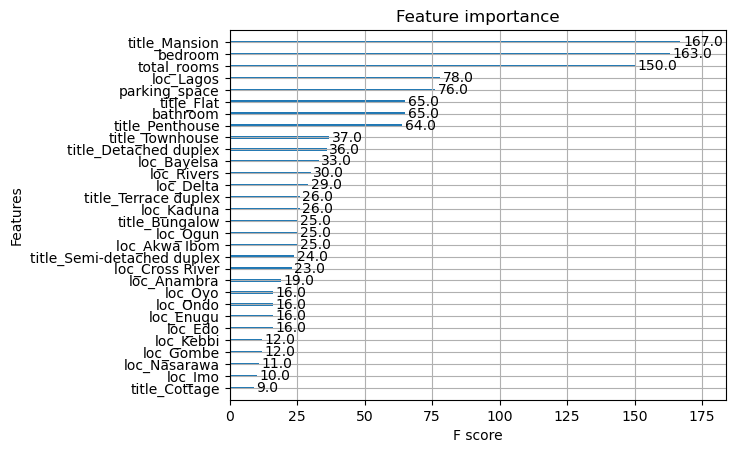

In [22]:
# Plot feature importance
plt.figure(figsize=(12, 6))
xgb.plot_importance(best_xgboost_model, max_num_features=30)  
plt.show()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


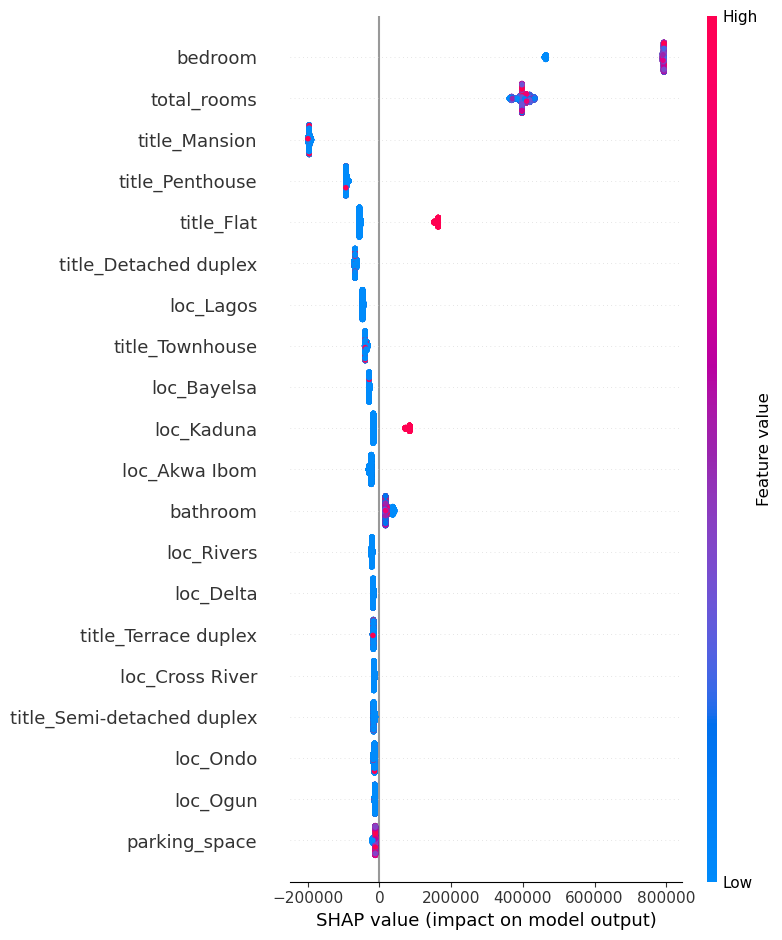

In [23]:
import shap

# Calculate SHAP values
explainer = shap.Explainer(best_xgboost_model)
shap_values = explainer(X_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test)

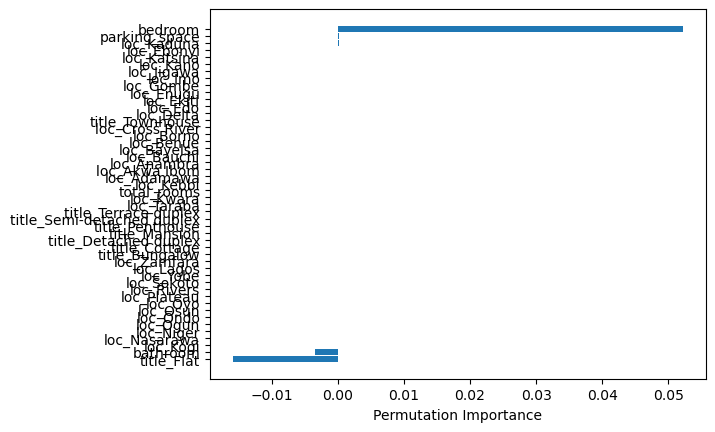

In [26]:

# Calculate permutation feature importance
perm_importance = permutation_importance(best_xgboost_model, X_test, y_test)

# Plot permutation feature importance
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X_test.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()


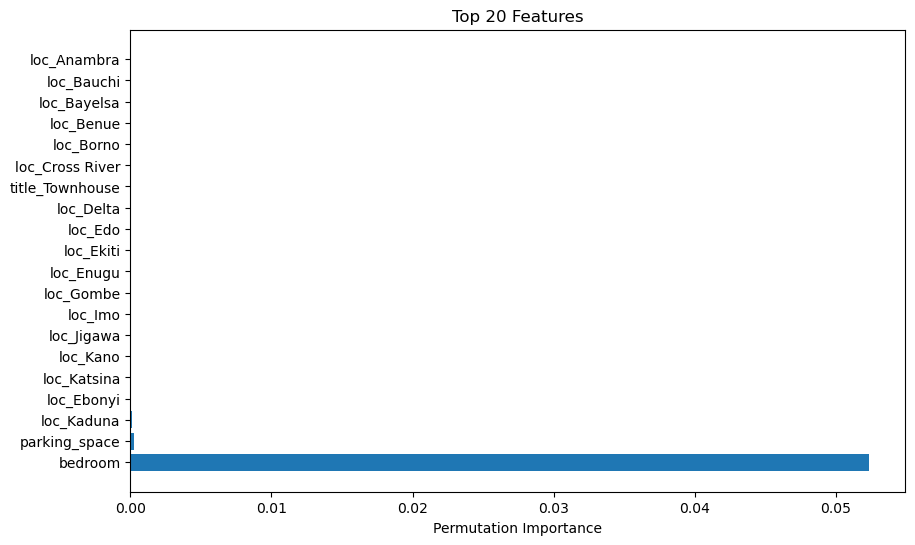

In [25]:
from sklearn.inspection import permutation_importance

# Calculate permutation feature importance
perm_importance = permutation_importance(best_xgboost_model, X_test, y_test)

# Sort the features in descending order of importance
sorted_idx = perm_importance.importances_mean.argsort()[::-1]

# Specify the number of top important features to display
top_n_features = 20

# Plot permutation feature importance for the top N features
plt.figure(figsize=(10, 6))
plt.barh(X_test.columns[sorted_idx][:top_n_features], perm_importance.importances_mean[sorted_idx][:top_n_features])
plt.xlabel("Permutation Importance")
plt.title(f"Top {top_n_features} Features")
plt.show()

In [27]:
# Create the LightGBM Dataset for training and testing
lgb_train = lgb.Dataset(X_train_n, label=y_train)

# Set the hyperparameters
params = {
    'objective': 'regression',  # For regression tasks
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100
}

# Train the LightGBM model
lightgbm_model = lgb.train(params, lgb_train)

# Make predictions on the testing set
lightgbm_predictions = lightgbm_model.predict(X_test_n)

# Calculate RMSE
lightgbm_rmse = mean_squared_error(y_test, lightgbm_predictions, squared=False)
print("LightGBM RMSE:", lightgbm_rmse)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004397 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 178
[LightGBM] [Info] Number of data points in the train set: 10500, number of used features: 48
[LightGBM] [Info] Start training from score 2132133.190905
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

Found `n_estimators` in params. Will use it instead of argument


In [28]:
# Create the LightGBM Dataset for training
lgb_train = lgb.Dataset(X_train_n, label=y_train)

# Set the hyperparameters to search over
param_grid = {
    'objective': ['regression'],
    'max_depth': [3, 5, 7,8],          # Try different maximum depths
    'learning_rate': [0.05, 0.1, 0.2],  # Try different learning rates
    'n_estimators': [50, 100, 150, 200]  # Try different numbers of estimators (trees)
}

# Create the LightGBM regressor
lightgbm_model = lgb.LGBMRegressor()

# Create Grid Search with cross-validation (5 folds)
grid_search = GridSearchCV(lightgbm_model, param_grid, cv=5, 
                           scoring='neg_mean_squared_error', 
                           n_jobs=-1)

# Train the model with Grid Search
grid_search.fit(X_train_n, y_train)

# Get the best model from Grid Search
best_lightgbm_model = grid_search.best_estimator_

# Make predictions on the testing set with the best model
lightgbm_predictions = best_lightgbm_model.predict(X_test_n)

# Calculate RMSE for the best LightGBM model
lightgbm_rmse = mean_squared_error(y_test, lightgbm_predictions, squared=False)
print("Best LightGBM RMSE:", lightgbm_rmse)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Best LightGBM RMSE: 580830.0696896048


In [30]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'objective': 'regression'}


In [29]:
# Making predictions on the test_submission set and calculating the RMSE
lg_test = best_lightgbm_model.predict(test_X)
#Save pred
save_pred('lg_latest.csv',lg_test)

In [31]:
# Train Gradient Boosting Regressor
gradient_boost_model = GradientBoostingRegressor()
gradient_boost_model.fit(X_train_n, y_train)

# Make predictions on the testing set
gradient_boost_predictions = gradient_boost_model.predict(X_test_n)

# Calculate Root Mean Squared Error (RMSE) for each model
gradient_boost_rmse = mean_squared_error(y_test, gradient_boost_predictions, squared=False)
print('Root Mean Squared Error is :',gradient_boost_rmse)

Root Mean Squared Error is : 611033.9119960171


In [32]:
# Initializing the Gradient Boosting Regressor
gradient_boost_model = GradientBoostingRegressor()

# Settting the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150, 200],          # Varying the number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1, 0.2],       # Varying the learning rate
    'max_depth': [3, 6, 9, 15],                  # Varying the depth of the trees
    'min_samples_split': [2, 5, 10, 15]          # Varying the minimum samples required to split an internal node
}

# Performing Grid Search with RMSE as the scoring metric
grid_search = GridSearchCV(
    estimator=gradient_boost_model,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',    # Use negative RMSE as the scoring metric
    cv=5                                      # Use 5-fold cross-validation
)

# Fitting the Grid Search to find the best hyperparameters
grid_result = grid_search.fit(X_train_n, y_train)

# Extracting the best hyperparameters and retrain the model with the optimal values
best_params = grid_result.best_params_
print("Best Hyperparameters:", best_params)

# Training the model with the best hyperparameters
best_gradient_boost_model = GradientBoostingRegressor(**best_params)
best_gradient_boost_model.fit(X_train_n, y_train)

# Making predictions on the test set and calculate the RMSE
best_gradient_boost_predictions = best_gradient_boost_model.predict(X_test_n)
best_gradient_boost_rmse = mean_squared_error(y_test, best_gradient_boost_predictions, squared=False)
print("Best Gradient Boosting Regressor RMSE:", best_gradient_boost_rmse)

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_split': 15, 'n_estimators': 200}
Best Gradient Boosting Regressor RMSE: 580732.709144145


In [33]:
# Making predictions on the test_submission set and calculating the RMSE
gb_test = best_gradient_boost_model.predict(test_X)
#Save pred
save_pred('gb_latest.csv',gb_test)

In [34]:
# Train Random Forest Regressor
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train_n, y_train)

# Make predictions on the testing set
random_forest_predictions = random_forest_model.predict(X_test_n)

# Calculate Root Mean Squared Error (RMSE) for each model
random_forest_rmse = mean_squared_error(y_test, random_forest_predictions, squared=False)
print('Root Mean Squared Error is :',random_forest_rmse)

Root Mean Squared Error is : 660565.8590041581


In [24]:
#Implementing grid search
# Define the parameter grid to search
param_dist = {
    'n_estimators': np.arange(50, 300, 10),
    'max_depth': [None] + list(np.arange(5, 30, 5)),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'bootstrap': [True, False]
}


# Create a Random Forest Regressor
random_forest_model = RandomForestRegressor(random_state=42)

# Perform Grid Search Cross Validation
random_search = RandomizedSearchCV(
    random_forest_model,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings that are sampled
    cv=5,  # Number of cross-validation folds
    n_jobs=-1,  # Use all available CPU cores for faster search
    random_state=42
)
# Fit the model to the data
random_search.fit(X_train_n, y_train)

# Extracting the best hyperparameters and retrain the model with the optimal values
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model from the search
best_random_forest_model = random_search.best_estimator_

# Make predictions on the testing set using the best model
random_forest_predictions = best_random_forest_model.predict(X_test_n)

# Calculate Root Mean Squared Error (RMSE) for the best model
random_forest_rmse = mean_squared_error(y_test, random_forest_predictions, squared=False)
print('Root Mean Squared Error is:', random_forest_rmse)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Best Hyperparameters: {'n_estimators': 190, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True}
Root Mean Squared Error is: 623894.5822928571


In [25]:
# Making predictions on the test_submission set and calculating the RMSE
rf_test = best_random_forest_model.predict(test_X)
#Save pred
save_pred('rf_latest.csv',rf_test)

In [26]:
# Train Decision Tree Regressor
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)

# Make predictions on the testing set
decision_tree_predictions = decision_tree_model.predict(X_test)

# Calculate Root Mean Squared Error (RMSE) for each model
decision_tree_rmse = mean_squared_error(y_test, decision_tree_predictions, squared=False)
print('Root Mean Squared Error is :',random_forest_rmse)

Root Mean Squared Error is : 623894.5822928571


In [28]:
#Tuning DT Model
# Define the DecisionTreeRegressor model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Define the hyperparameter grid for tuning
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],  # Valid criterion values
    'max_depth': [None, 10, 20, 30, 50],                        # Maximum depth of the tree
    'min_samples_split': [2, 5, 8, 10],                        # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 10]                           # Minimum samples required to be at a leaf node
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=decision_tree_model, 
                           param_grid=param_grid, 
                           scoring='neg_mean_squared_error', 
                           cv=7, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from GridSearchCV
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Create the best DecisionTreeRegressor model with the best hyperparameters
best_decision_tree_model = DecisionTreeRegressor(**best_params, random_state=42)

# Train the model on the entire training set
best_decision_tree_model.fit(X_train, y_train)

# Make predictions on the testing set using the best model
best_decision_tree_predictions = best_decision_tree_model.predict(X_test)

# Calculate Root Mean Squared Error (RMSE) for the best model
best_decision_tree_rmse = mean_squared_error(y_test, best_decision_tree_predictions, squared=False)
print('Root Mean Squared Error for Best Decision Tree:', best_decision_tree_rmse)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Best Hyperparameters: {'criterion': 'friedman_mse', 'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 2}
Root Mean Squared Error for Best Decision Tree: 669604.7657431606


In [29]:
# Making predictions on the test_submission set and calculating the RMSE
dt_test = best_decision_tree_model.predict(test_X)
#Save pred
save_pred('dt_latest.csv',rf_test)

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [51]:
# Convert the data to PyTorch tensors and create DataLoader
X_train_n_tensor = torch.tensor(X_train_n.values, dtype=torch.float32).to(device)
y_train_n_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1).to(device)
train_n_dataset = TensorDataset(X_train_n_tensor, y_train_n_tensor)
train_n_loader = DataLoader(train_n_dataset, batch_size=32, shuffle=True)

In [37]:
# # Convert the normalized data to PyTorch tensors and create DataLoader
# X_train_n_tensor = torch.tensor(X_train_n.values, dtype=torch.float32)
# train_n_dataset = TensorDataset(X_train_n_tensor, y_train_tensor)
# train_n_loader = DataLoader(train_n_dataset, batch_size=32, shuffle=True)

In [38]:
X_train.shape[1]

48

In [67]:
# Building the Neural Network
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 1)
        self.dropout = nn.Dropout(p=0.25)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout(x)
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x

In [40]:
#Training new norm Model
new_model = RegressionModel(input_dim=X_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(new_model.parameters(), lr=0.001)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
new_model.to(device)

epochs = 250
torch.manual_seed(44)
for epoch in range(epochs):
    new_model.train()
    for i, (inputs, labels) in enumerate(train_n_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = new_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    if epoch % 50 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [1/250], Loss: 60767424512.0000
Epoch [51/250], Loss: 64001363968.0000
Epoch [101/250], Loss: 321087602688.0000
Epoch [151/250], Loss: 84284768256.0000
Epoch [201/250], Loss: 194795372544.0000


In [41]:
# Step 4: Evaluate the Model
new_model.eval()
with torch.no_grad():
    X_test_tensor = torch.tensor(X_test_n.values, dtype=torch.float32).to(device)
    y_pred = new_model(X_test_tensor).cpu().squeeze().numpy()

# Calculate evaluation metrics (e.g., mean squared error)
mse = np.mean((y_pred - y_test.values)**2)
print(f"Mean Squared Error on Test Data: {mse:.4f}")

# Calculate RMSE
rmse = np.sqrt(np.mean((y_pred - y_test.values) ** 2))

print(f"Root Mean Squared Error on Test Data: {rmse:.4f}")

Mean Squared Error on Test Data: 327863024301.5071
Root Mean Squared Error on Test Data: 572593.2451


In [42]:
# Making pred on the test set
new_model.eval()
with torch.no_grad():
    test_X_tensor = torch.tensor(test_X.values, dtype=torch.float32).to(device)
    y_pred = new_model(test_X_tensor).cpu().squeeze().numpy()

#Save pred
save_pred('nn_new03.csv',y_pred)

In [43]:
#saving and loading the model
from pathlib import Path

#creating dir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#create model save path
MODEL_NAME = "pytorch_workflow_model_lr001.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#saving the model
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=new_model.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/pytorch_workflow_model_lr001.pth


In [44]:
! pip install skorch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.3/221.3 kB 5.2 MB/s eta 0:00:00a 0:00:01


In [ ]:
#Training new Model
model_0 = RegressionModel(input_dim=X_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(new_model.parameters(), lr=0.001)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_0.to(device)

epochs = 400
torch.manual_seed(44)
torch.cuda.manual_seed(42)
for epoch in range(epochs):
    model_0.train()
    for i, (inputs, labels) in enumerate(train_n_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model_0(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    if epoch % 50 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [1/400], Loss: 6171601666048.0000
Epoch [51/400], Loss: 6586131021824.0000


In [64]:
# Evaluating the Model
model_0.eval()
with torch.no_grad():
    X_test_tensor = torch.tensor(X_test_n.values, dtype=torch.float32).to(device)
    y_pred = model_0(X_test_tensor).cpu().squeeze().numpy()

# Calculate evaluation metrics (e.g., mean squared error)
mse_0 = np.mean((y_pred - y_test.values)**2)
print(f"Mean Squared Error on Test Data: {mse:.4f}")

# Calculate RMSE
rmse_0 = np.sqrt(np.mean((y_pred - y_test.values) ** 2))

print(f"Root Mean Squared Error on Test Data: {rmse_0:.4f}")

Mean Squared Error on Test Data: 327863024301.5071
Root Mean Squared Error on Test Data: 2419845.4444
